# Extra Examples - Grouping

Lets use some video game sales data: https://www.kaggle.com/gregorut/videogamesales

And answer:

1. Which genre has the highest average global sales averaged over all games
2. Which top 5 games are responsible for the biggest profit in that genre?
3. For each platform and year, what is the highest performing game?
4. For each Genre, what is the mean and standard deviation for game sales in EU? 
5. Bonus advanced follow up - can you answer if mean and std is a good representation of the data? (Hint code provided)

In [2]:
import pandas as pd

df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Highest earning genre

In [5]:
df.groupby("Genre").Global_Sales.mean()
# So the answer is Platform

Genre
Action          0.528100
Adventure       0.185879
Fighting        0.529375
Misc            0.465762
Platform        0.938341
Puzzle          0.420876
Racing          0.586101
Role-Playing    0.623233
Shooter         0.791885
Simulation      0.452364
Sports          0.567319
Strategy        0.257151
Name: Global_Sales, dtype: float64

## Which games carry this genre?

In [13]:
df[df.Genre == "Platform"].sort_values("Global_Sales", ascending=False).Name.head(5)
# Mario carrying the sales as expected

1             Super Mario Bros.
6         New Super Mario Bros.
8     New Super Mario Bros. Wii
18            Super Mario World
21             Super Mario Land
Name: Name, dtype: object

## Best genre for platform and year

This one is actually a bit challenging to do efficiently, have fun!

In [62]:
# Get performance of each genre by summing over all sales
performance = df.groupby(["Platform", "Year", "Genre"]).Global_Sales.sum().reset_index()
performance

,Platform,Year,Genre,Global_Sales
0,2600,1980.0,Action,0.34
1,2600,1980.0,Fighting,0.77
2,2600,1980.0,Misc,2.71
3,2600,1980.0,Shooter,7.07
4,2600,1980.0,Sports,0.49
...,...,...,...,...
1799,XOne,2016.0,Role-Playing,0.52
1800,XOne,2016.0,Shooter,4.40
1801,XOne,2016.0,Simulation,0.01
1802,XOne,2016.0,Sports,3.74


In [70]:
# Then get the index of the maximum for each Platform/Year group
indexes = performance.groupby(["Platform", "Year"]).Global_Sales.idxmax()

# And use those indexes to pull out the final data
result = performance.loc[indexes]

# Lets look at the Xbox box series sales:
result[result.Platform.isin(["XB", "X360", "XOne"])]

# No surprise here, given Halo and Call of Duty. Note that we have some missing data, 
# ie the XB 2008 year has sports, with tiny profit. Sports is the only entry...

,Platform,Year,Genre,Global_Sales
1587,X360,2005.0,Shooter,3.17
1596,X360,2006.0,Shooter,15.69
1608,X360,2007.0,Shooter,34.17
1612,X360,2008.0,Action,43.61
1631,X360,2009.0,Shooter,34.23
1642,X360,2010.0,Shooter,41.58
1653,X360,2011.0,Shooter,45.81
1662,X360,2012.0,Shooter,37.50
1666,X360,2013.0,Action,35.81
1683,X360,2014.0,Shooter,11.64


## Mean and Std in EU per Genre

In [80]:
stats = df.groupby("Genre").agg(MeanEU=("EU_Sales", "mean"), StdEU=("EU_Sales", "std")).reset_index()
stats

,Genre,MeanEU,StdEU
0,Action,0.158323,0.407424
1,Adventure,0.049868,0.176454
2,Fighting,0.119481,0.253013
3,Misc,0.124198,0.446592
4,Platform,0.227573,0.588545
5,Puzzle,0.087251,0.318550
6,Racing,0.190865,0.581181
7,Role-Playing,0.126384,0.488864
8,Shooter,0.239137,0.549189
9,Simulation,0.130773,0.514097


## Is this a good representation?

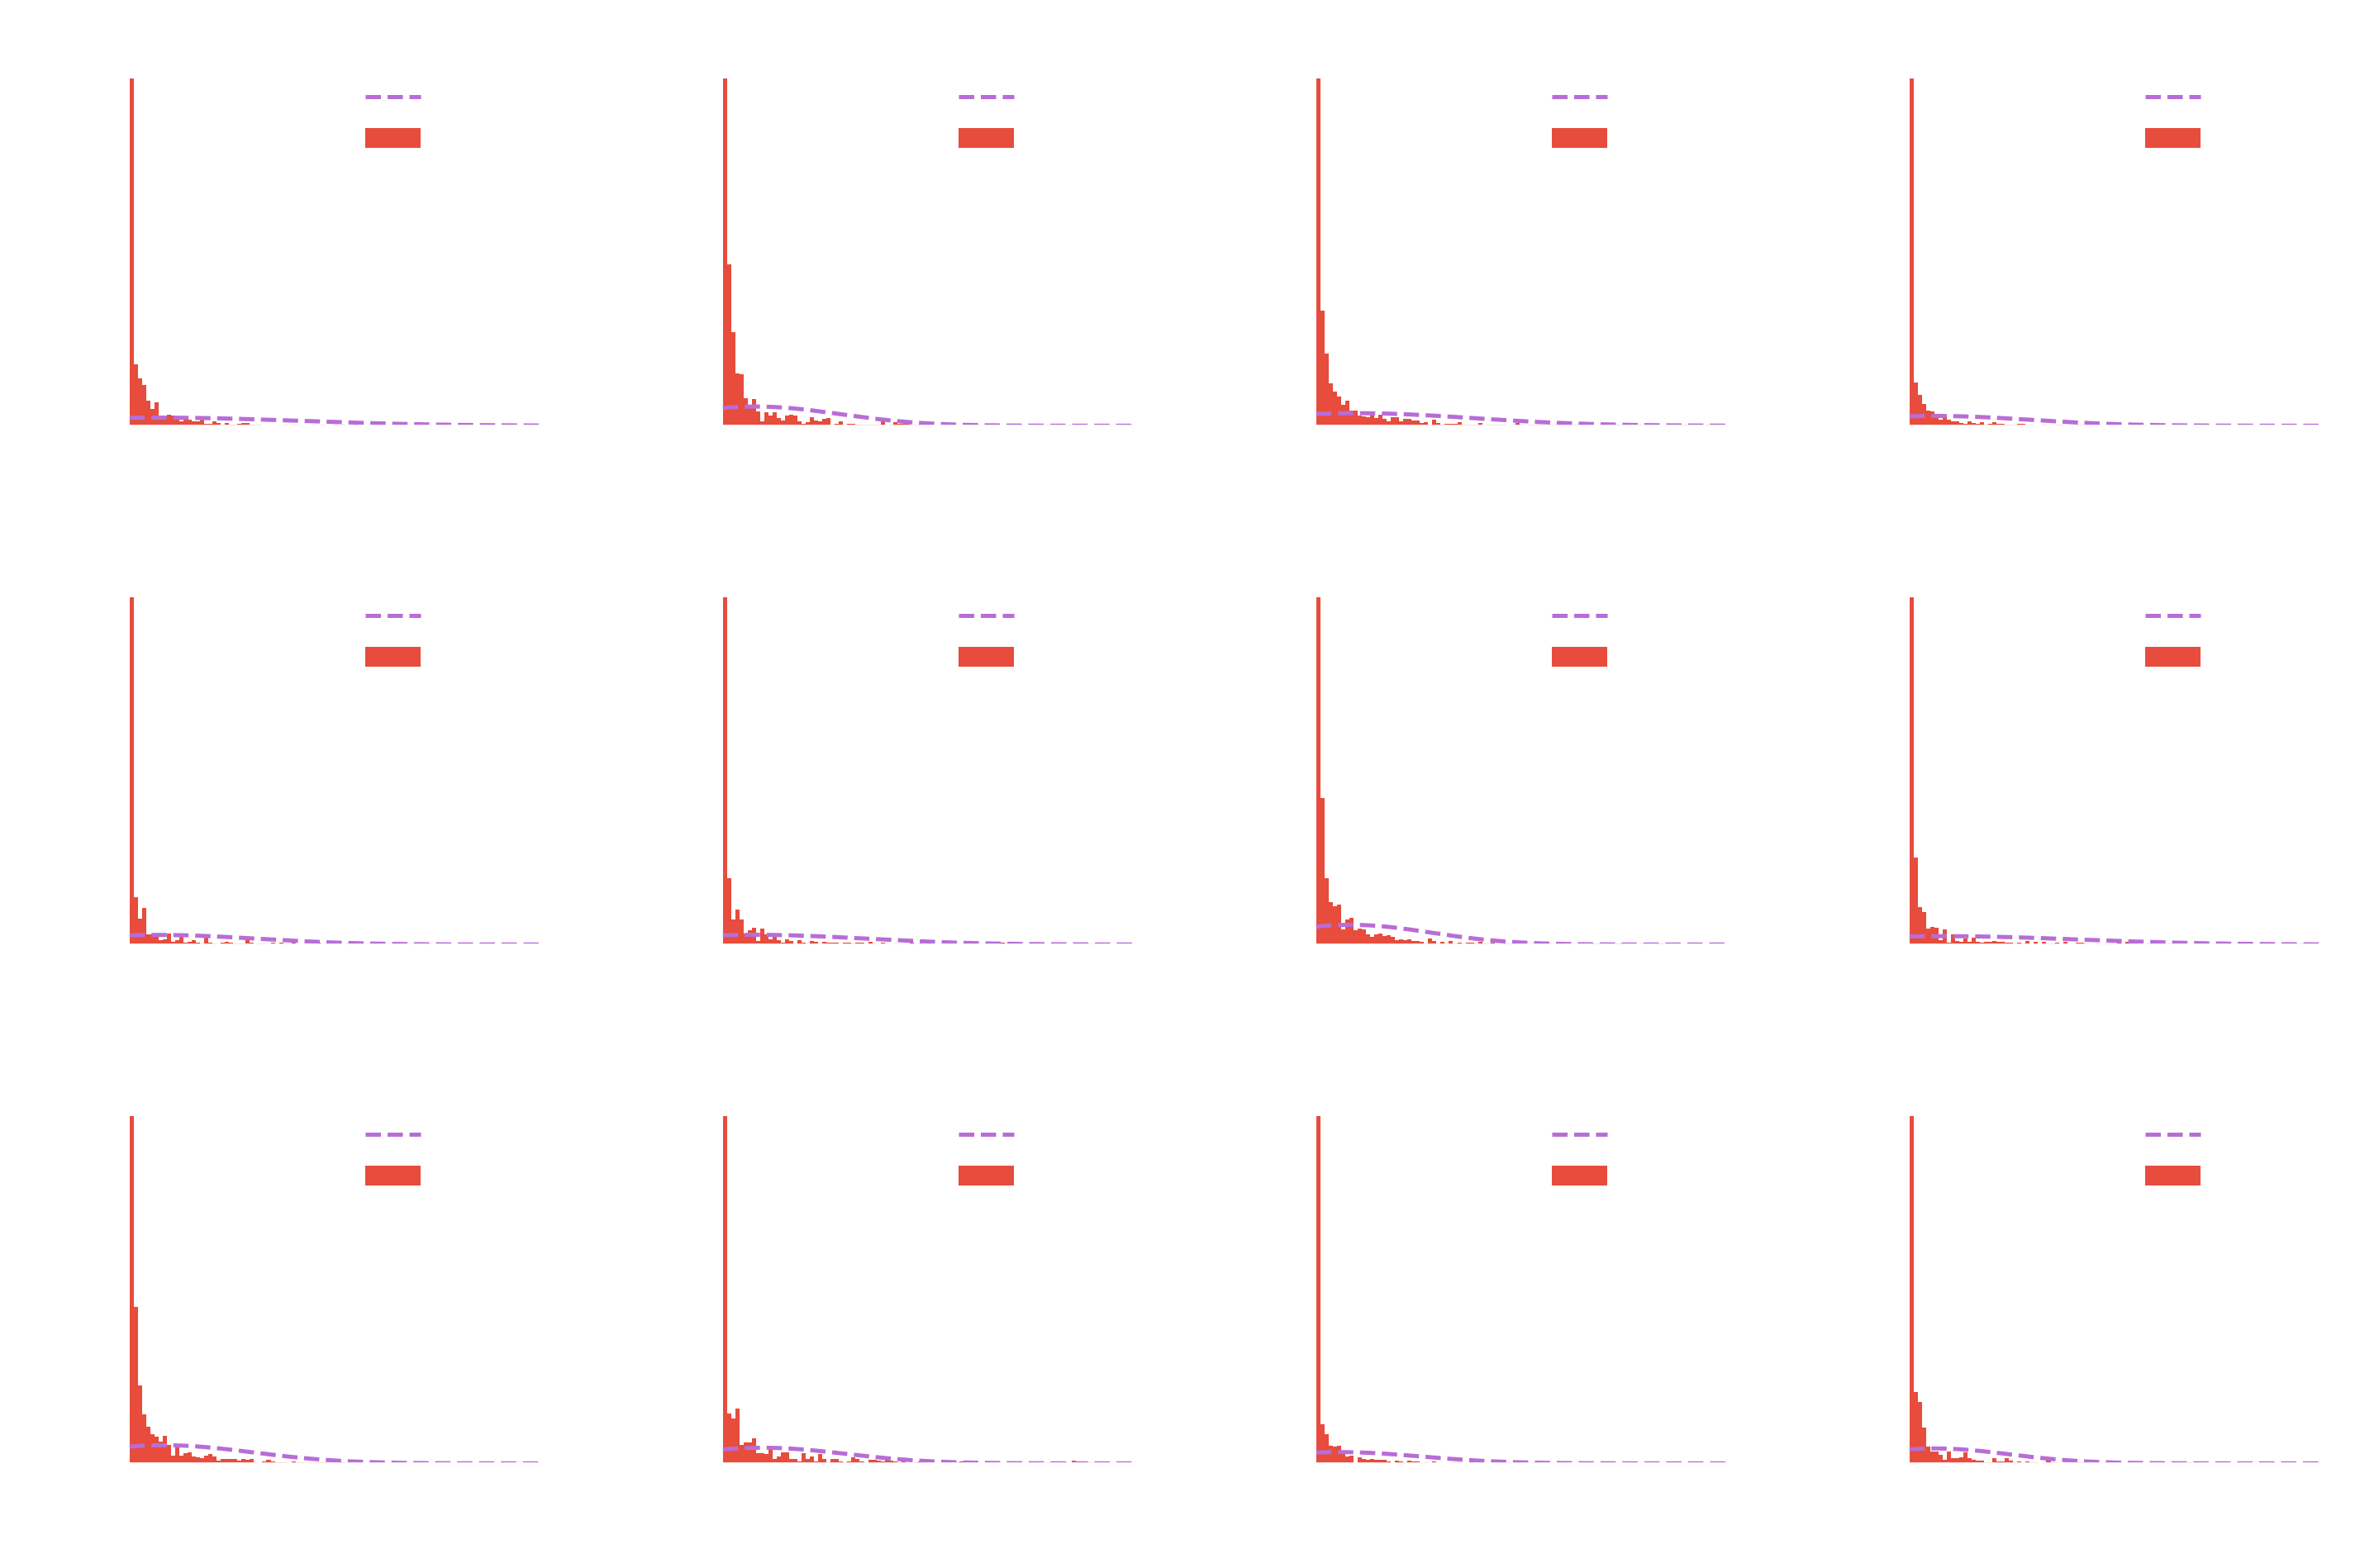

In [105]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

genres = df.Genre.unique()

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
for g, ax in zip(genres, axes.flatten()):
    data = df[df.Genre == g].EU_Sales
    summary = stats[stats.Genre == g]
    
    bins = np.linspace(0, data.quantile(0.99), 100)
    xs = np.linspace(0, data.quantile(0.99), 1000)
    normal = norm.pdf(xs, summary.MeanEU, summary.StdEU)
    
    ax.hist(data, bins=bins, label="Data", density=True)
    ax.plot(xs, normal, label="Approx")
    
    ax.set_title(g), ax.set_xlabel("EU Sales"), ax.set_ylabel("Prob")
    ax.legend();
plt.tight_layout()

So as we can clearly see, this is an absolutely horrible approximation. The distribution is not normal, its bounded by zero on the lower and. Looks more like an exponential distribution. If you're curious about probabilities and all this stuff, I've got a course on that too. Not expecting anyone to take it, but if you're interested, [heres a link](https://www.udemy.com/course/python-for-statistical-analysis/?referralCode=76158B46FA5EB57C38EB). Hopefully the referral gives you a discount, if not and you're keen, let me know.